In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('iphone_purchase_records.csv')

In [4]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [7]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


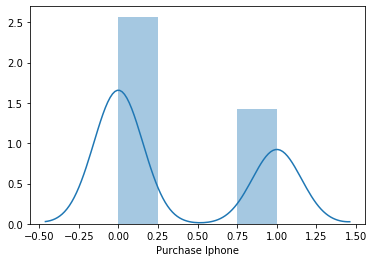

In [8]:
sns.distplot(df['Purchase Iphone'])

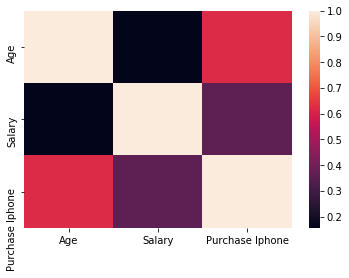

In [9]:
corr=df.corr()
sns.heatmap(corr)

In [10]:
col=['Gender']

In [11]:
df=pd.get_dummies(df,columns=col,drop_first=True)

In [12]:
df.head()

,Age,Salary,Purchase Iphone,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [13]:
df['Gender_Male']=df['Gender_Male'].astype('int')

In [14]:
X=df.drop('Purchase Iphone',axis=1)
y=df['Purchase Iphone']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ssd=StandardScaler()

In [17]:
X=ssd.fit_transform(X)

In [18]:
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr=LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
prediction_lr=lr.predict(X_test)

In [30]:
from sklearn.metrics import f1_score,accuracy_score

In [27]:
f1_lr=f1_score(y_test,prediction_lr)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
ks=40
mean_acc=np.zeros(ks-1)
std_acc=np.zeros(ks-1)

for n in range(1,ks):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    
    mean_acc[n-1]=accuracy_score(y_test,pred)
    
    std_acc[n-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])

In [32]:
print("Maximum accuracy score is ",mean_acc.max(), "and highest k value is", mean_acc.argmax()+1 )

Maximum accuracy score is  0.9318181818181818 and highest k value is 7


In [33]:
error_rate=[]

for i in range(1,ks):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    
    error_rate.append(np.mean(pred!=y_test))

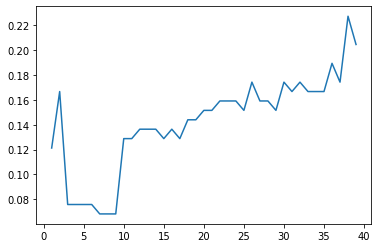

In [34]:
plt.plot(range(1,40),error_rate)

In [35]:
knn=KNeighborsClassifier(n_neighbors=7)


In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [37]:
predict_kt=knn.predict(X_test)

In [38]:
f1_knn=f1_score(y_test,predict_kt)

In [39]:
f1_knn

0.9142857142857143

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt=DecisionTreeClassifier()

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
pred_dt=dt.predict(X_test)

In [44]:
f1_dt=f1_score(y_test,pred_dt)

In [45]:
f1_dt

0.78

In [46]:
from sklearn.svm import SVC

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
paramgrid={'C':[0.1,1,10,100,1000],'gamma':[10,1,0.1,0.01,0.001]}

In [51]:
grid=GridSearchCV(SVC(),paramgrid,verbose=3)

In [52]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=10, score=0.648, total=   0.1s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.667, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.667, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.660, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.660, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.815, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.870, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .

[CV] ....................... C=10, gamma=1, score=0.849, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.887, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.907, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.944, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.852, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.830, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.868, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .

[CV] .................. C=1000, gamma=0.01, score=0.926, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.815, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.830, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.868, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.833, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.889, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.796, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [53]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [54]:
svc=SVC(C=1,gamma=1)

In [55]:
svc.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [56]:
pred_svc=svc.predict(X_test)

In [57]:
f1_svc=f1_score(y_test,pred_svc)

In [58]:
f1_svc

0.9245283018867925

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rt=RandomForestClassifier(n_estimators=25)

In [69]:
rt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
pred_rf=rt.predict(X_test)

In [71]:
f1_rt=f1_score(y_test,pred_rf)

In [72]:
f1_rt

0.8653846153846154

In [59]:
f1_dt

0.78

In [60]:
f1_knn

0.9142857142857143

In [61]:
f1_lr

0.7586206896551724

In [62]:
f1_svc

0.9245283018867925

In [73]:
data={'F1-Score':[f1_dt,f1_knn,f1_lr,f1_svc,f1_rt]}

In [74]:
report=pd.DataFrame(data,index=['Decision Tree','KNN','Logistic','SVC','Random Forest'])

In [75]:
report=report.rename(columns={'index':'Algorithm'})

In [76]:
report

,F1-Score
Decision Tree,0.780000
KNN,0.914286
Logistic,0.758621
SVC,0.924528
Random Forest,0.865385
